In [59]:
import pandas as pd

df = pd.read_excel('/Users/davidosullivan/Desktop/ATU_DataAnalytics_Semester2/weather_data.xlsx')
df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,1996-04-10 14:00:00,0,0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,1996-07-31 08:00:00,0,0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,1996-07-31 09:00:00,0,0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,1996-07-31 10:00:00,0,0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,1996-07-31 11:00:00,0,0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [81]:
# Account for null values - For accuracy better to use dropna() rather than fillna()
df = weather.dropna()

In [61]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

#### 1) Plot the Temperature

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

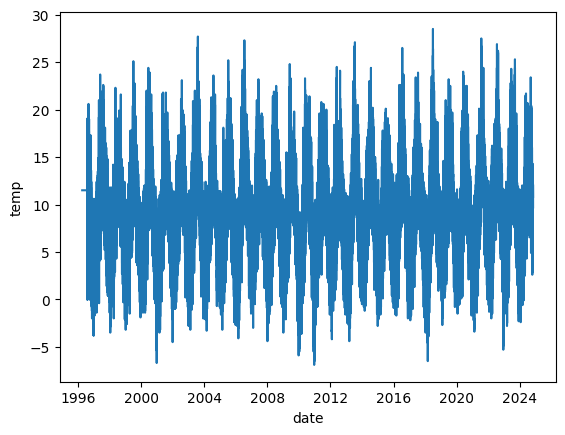

In [182]:
sns.lineplot(data = df, x = "date", y="temp")

# Save
plt.savefig('temp_plot.png')

In [147]:
#df.set_index('date', inplace=True)

#### 2) Plot The Mean Temperature Each Day

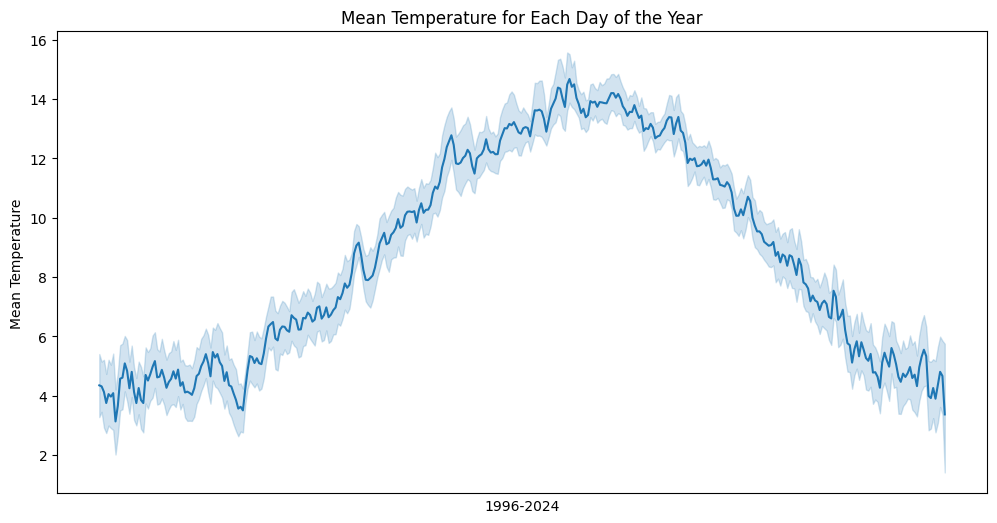

<Figure size 640x480 with 0 Axes>

In [181]:
df.sort_index(inplace=True)  

# Extract year and day-of-year
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

# Calculate mean temperature for each day in each year
daily_mean = df.groupby(['year', 'day_of_year'])['temp'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_mean, x="day_of_year", y="temp")
plt.title("Mean Temperature for Each Day of the Year")
plt.xlabel("1996-2024")
plt.ylabel("Mean Temperature")

# Format
plt.xticks([])

# Show
plt.show()

# Save
plt.savefig('daily_mean_temp.png')

#### 3) Plot The Mean Temperature Each Month
To make the colours look better I came across normalization https://www.delftstack.com/howto/python-pandas/pandas-normalize/#google_vignette

Used below to make the higher temperatures red and lower ones blue

/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_74450/2995347701.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_mean, x='month', y='temp', palette=colors)
/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_74450/2995347701.py:14: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=monthly_mean, x='month', y='temp', palette=colors)


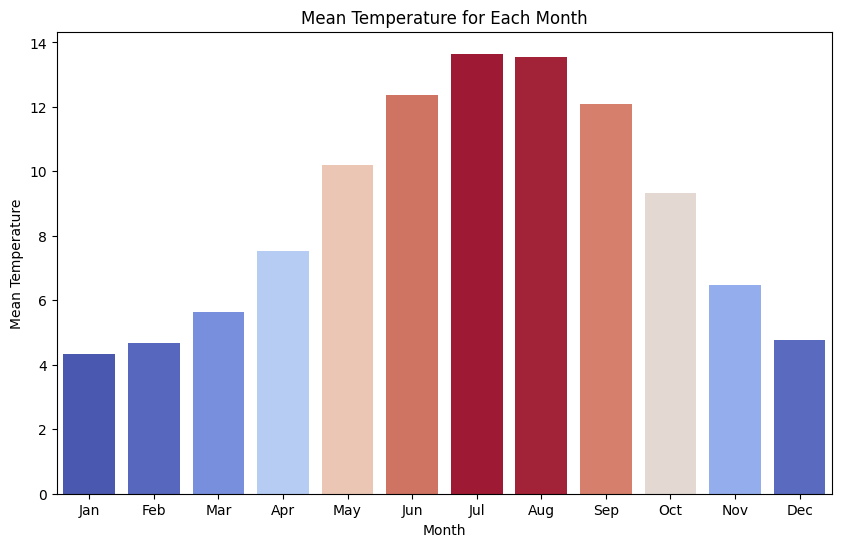

<Figure size 640x480 with 0 Axes>

In [172]:
# Extract the month for grouping
df['month'] = df.index.strftime('%m')

# Calculate mean temperature for each month
monthly_mean = df.groupby('month')['temp'].mean().reset_index()

# Normalize the temperature values for color mapping
norm = (monthly_mean['temp'] - monthly_mean['temp'].min()) / (monthly_mean['temp'].max() - monthly_mean['temp'].min())

colors = sns.color_palette("coolwarm", as_cmap=True)(norm)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_mean, x='month', y='temp', palette=colors)
plt.title("Mean Temperature for Each Month")
plt.xlabel("Month")
plt.ylabel("Mean Temperature")

# Format
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show
plt.show()

# Save
plt.savefig('mean_monthly_temp.png')


#### 4) Plot the Windspeed - Plotting over years

In [86]:
# Step 1: Convert to numeric, coercing non-numeric to NaN
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

# Step 2: Handle missing values (if needed)
df['wdsp'] = df['wdsp'].dropna()

# Step 3: Convert to int64
df['wdsp'] = df['wdsp'].astype('float64')

# Verify the result
print(df['wdsp'].dtype)  # Should now be int64


float64


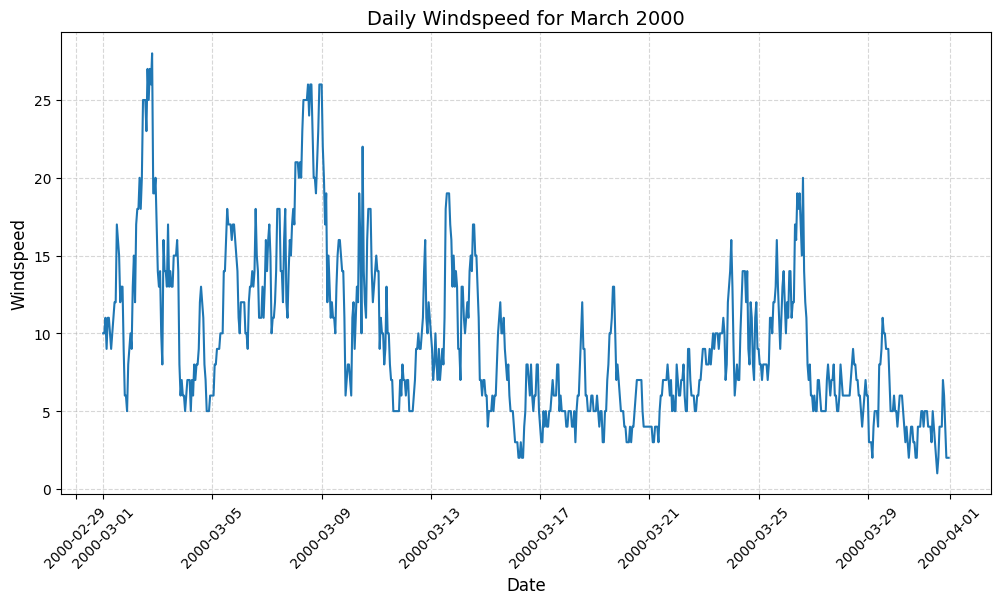

<Figure size 640x480 with 0 Axes>

In [170]:
# Filter data for March 2000
march_2000 = df.loc['2000-03']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=march_2000, x=march_2000.index, y="wdsp")

# Format
plt.title("Daily Windspeed for March 2000", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Windspeed", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show
plt.show()

# Save
plt.savefig('daily_windspeed_march.png')

#### 5) Rolling Windspeed Over 24 hours

In [121]:
# Set date as the index

# Sort the data by date
df.sort_index(inplace=True)

# Calculate rolling windspeed over a 1 day
df['rolling_30_day'] = df['wdsp'].rolling(30,1).mean()

df.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,ind.4,wddir,ww,w,sun,vis,clht,clamt,rolling_1_day,rolling_30_day
date,,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0,0,11.5,0,8.1,3.9,0.0,0,1016.7,...,0,0,25,81,0.0,35000,32,5,0.0,0.0
1996-07-31 08:00:00,0,0,0,11.5,0,11.1,10.7,0.0,0,1011.4,...,0,0,25,82,0.0,40000,45,5,0.0,0.0
1996-07-31 09:00:00,0,0,0,11.6,0,10.7,9.8,0.0,0,1011.4,...,0,0,80,81,0.0,8000,32,7,0.0,0.0
1996-07-31 10:00:00,0,0,0,12.9,0,11.3,9.8,0.0,0,1011.2,...,0,0,25,82,0.0,28000,35,6,0.0,0.0
1996-07-31 11:00:00,0,0,0,14.5,0,10.8,7.0,0.0,0,1011,...,0,0,2,11,0.0,40000,40,6,0.0,0.0


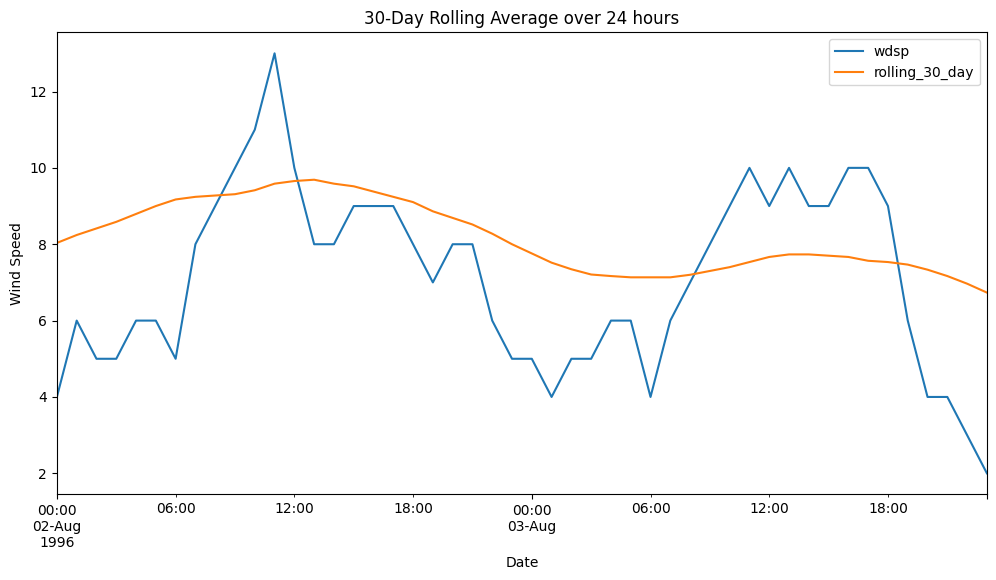

<Figure size 640x480 with 0 Axes>

In [169]:
# Subset for a specific date
subset = df.loc['1996-08-02':'1996-08-03']

# Plot for specific date
ax = subset.plot.line(y=['wdsp','rolling_30_day'], figsize=(12, 6))
ax.set_title("30-Day Rolling Average over 24 hours")
ax.set_xlabel("Date")
ax.set_ylabel("Wind Speed")
plt.show()

# Save
plt.savefig('rolling_average.png')


#### 6) Max Windspeed for Each Day of April 2006

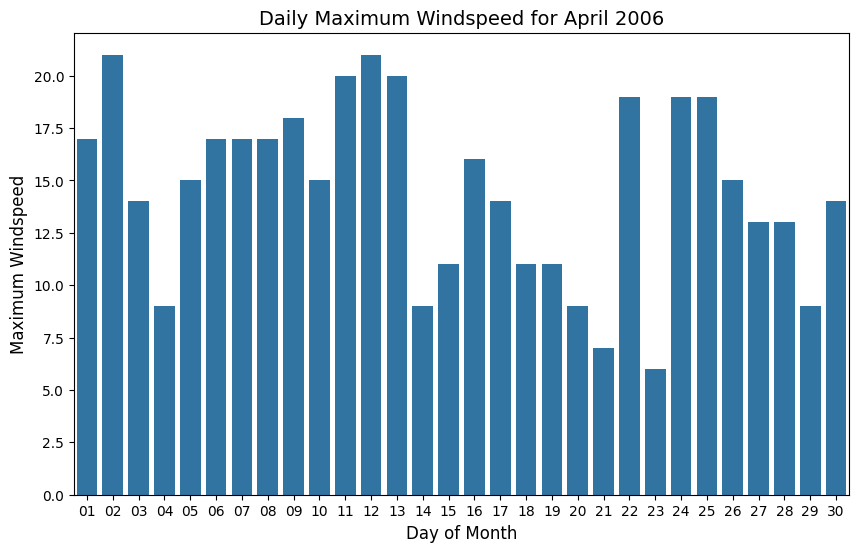

<Figure size 640x480 with 0 Axes>

In [168]:
df['day'] = df.index.strftime('%d')

# Filter data for March 2000
april_2006 = df.loc['2006-04']

# Calculate max windspeed for each day
april_2006_max = april_2006.groupby('day')['wdsp'].max().reset_index()

# Plot the daily maximum windspeed for April 2006
plt.figure(figsize=(10, 6))
sns.barplot(data=april_2006_max, x='day', y='wdsp')

# Add title and labels
plt.title("Daily Maximum Windspeed for April 2006", fontsize=14)
plt.xlabel("Day of Month", fontsize=12)
plt.ylabel("Maximum Windspeed", fontsize=12)
plt.show()

# Save
plt.savefig('daily_max_wdsp_april.png')

#### Monthly Mean of the Daily Max Windspeed

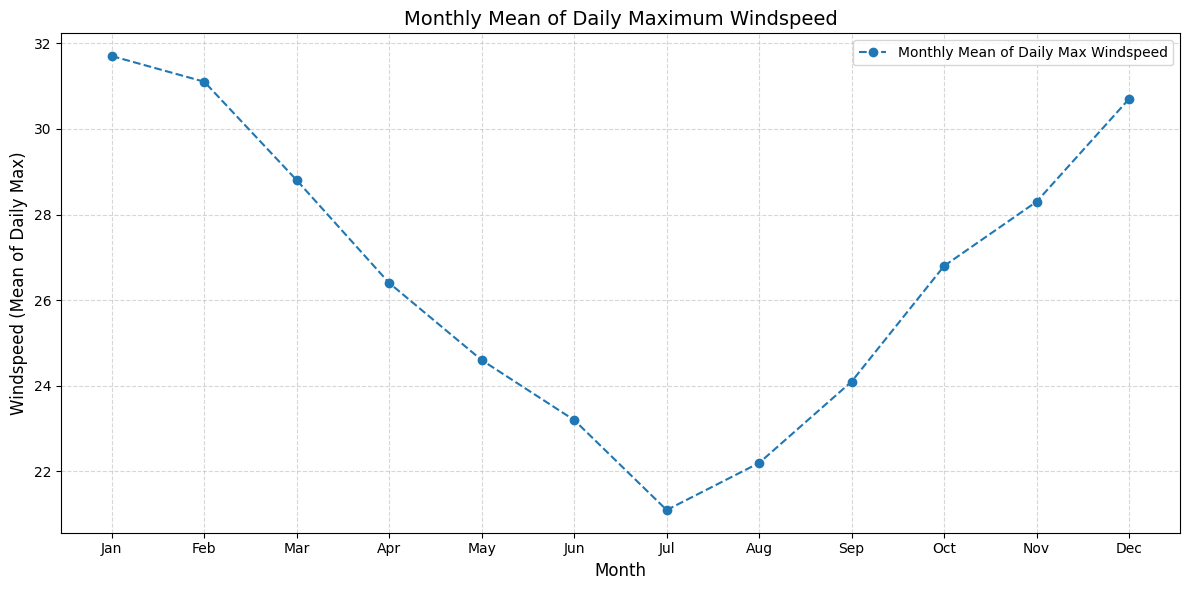

<Figure size 640x480 with 0 Axes>

In [171]:
# Get max windspeed for each day
daily_max = df.groupby(['month', 'day'])['wdsp'].max().reset_index()

# Get the mean of daily max windspeed for each month
mean_max = daily_max.groupby('month')['wdsp'].mean().round(1).reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(mean_max['month'].astype(str), mean_max['wdsp'], marker='o', linestyle='--', label='Monthly Mean of Daily Max Windspeed')

# Format
plt.title("Monthly Mean of Daily Maximum Windspeed", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Windspeed (Mean of Daily Max)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show plot
plt.tight_layout()
plt.show()

# Save 
plt.savefig('monthly_max_windspeed.png')
